# Принятие решений на основе данных

## Описание проекта

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки интернет-магазина.  

**Задачи:**
1. Приоритизировать гипотезы, 
2. Запустить A/B-тест,
3. Проанализировать результаты.

## Описание данных

**Данные для первой части**  

Файл /datasets/hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл /datasets/orders.csv.  
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез

**Задача:**  
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### *Шаг 1. Приоритизация по ICE*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

hyps = pd.read_csv('/datasets/hypothesis.csv')
hyps

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [2]:
hyps['ice'] = hyps['Impact'] * hyps['Confidence'] / hyps['Efforts']
pd.set_option('max_colwidth', 150)
hyps[['Hypothesis', 'ice']].sort_values(by = 'ice', ascending = False)

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По ICE-приоритизации в топе 8, 0 и 7 гипотезы. Гипотезы 5, 3 и 4 имеют самый низкий приоритет.

### *Шаг 2. Приоритизация по RICE*


In [3]:
hyps['rice'] = hyps['Impact'] * hyps['Confidence'] * hyps['Reach'] / hyps['Efforts']
pd.set_option('max_colwidth', 150)
hyps[['Hypothesis', 'rice']].sort_values(by = 'rice', ascending = False)

,Hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По RICE самой приоритетной гипотезой являтся 7. 8 гипотеза, самая приоритетная по ICE, только на пятом месте.  
Также существенно поднялся приоритет 2 гипотезы (с пятого на второе место).  
Это произошло, потому что охват 8 гипотезы (скидка в день рождения) очень низкий (каждый пользователь сможет воспользоваться только один раз за год, и не факт, что воспользуется). Тогда как форму для подписки на каждой странице (гипотеза 7) увидят все пользователи и неоднократно.  
То же самое с блоком рекомендации (гипотеза 2), его увидит каждый, кто зайдет на сайт.

## Часть 2. Анализ A/B-теста

**Задача**  

Проанализировать A/B-тест:  
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его.  

Варианты решений: 
- Остановить тест, зафиксировать победу одной из групп. 
- Остановить тест, зафиксировать отсутствие различий между группами. 
- Продолжить тест.

### *Шаг 1. Знакомство с данными*

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
print(orders.info())
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors = pd.read_csv('/datasets/visitors.csv')
print(visitors.info())
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### *Шаг 2. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.*

In [6]:
#Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(5)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [7]:
#Соберём кумулятивные данные по дням о заказах
ordersAggregated = datesGroups.apply(lambda x: 
                                     orders[np.logical_and(orders['date'] <= x['date'], 
                                     orders['group'] == x['group'])].agg({'date' : 'max', 
                                                                          'group' : 'max', 
                                                                          'transactionId' : pd.Series.nunique, 
                                                                          'visitorId' : pd.Series.nunique, 
                                                                          'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])
ordersAggregated.head(6)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996


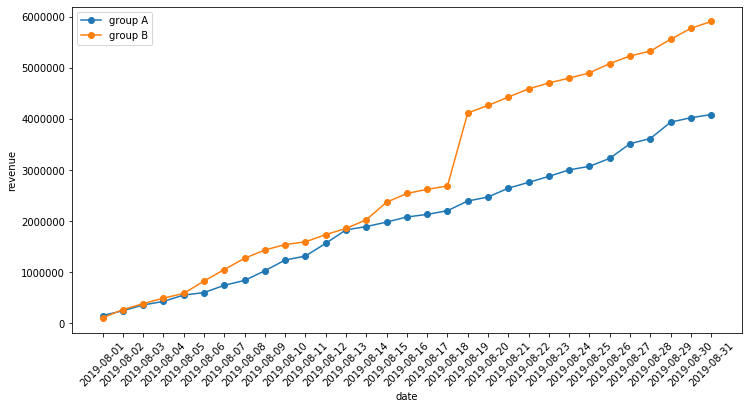

In [8]:
#Объявим функцию для построения графиков кумулятивных метрик в A/B тесте

def plot_grouped(df, ycolumn):

    dfA = df[df.group == 'A']
    dfB = df[df.group == 'B']

    plt.figure(figsize=(12,6))
    plt.plot(dfA.date, dfA[ycolumn], label='group A', marker = 'o')
    plt.plot(dfB.date, dfB[ycolumn], label='group B', marker = 'o')
    plt.xlabel('date')
    plt.ylabel(ycolumn)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    
plot_grouped(ordersAggregated, 'revenue')

Выручка в В на 50% выше, чем в А. Однако, 19.08 в группе В произошел резкий рост, тогда как А растет равномерно. Похоже на влияние одного экстремально дорогого заказа.

### *Шаг 3. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.*

In [9]:
#Соберём кумулятивные данные по дням о визитах
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                       visitors['group'] == x['group'])].agg({'date' : 'max', 
                                                                              'group' : 'max', 
                                                                              'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])
visitorsAggregated.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [10]:
#Объединим датасеты
ordersAggregated = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
ordersAggregated.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [26]:
#Добавим столбец со средним чеком
ordersAggregated['avg_revenue'] = ordersAggregated['revenue'] / ordersAggregated['visitors']
ordersAggregated.head(6)

,date,group,orders,buyers,revenue,visitors,avg_revenue,cr
0,2019-08-01,A,24,20,148579,719,206.646732,0.027816
1,2019-08-01,B,21,20,101217,713,141.959327,0.028050
2,2019-08-02,A,44,38,242401,1338,181.166667,0.028401
3,2019-08-02,B,45,43,266748,1294,206.142195,0.033230
4,2019-08-03,A,68,62,354874,1845,192.343631,0.033604
5,2019-08-03,B,61,59,380996,1803,211.312257,0.032723


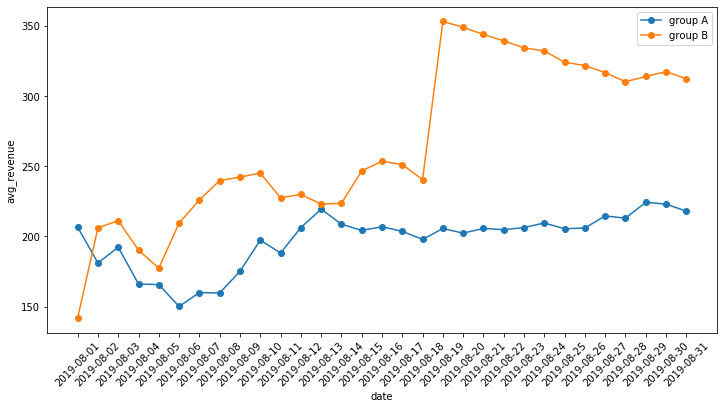

In [12]:
plot_grouped(ordersAggregated, 'avg_revenue')

Ко второй половине теста средний чек стабилизировался в обеих группах. Однако, и здесь мы видим резкий рост показателей в группе В 18 числа, который нужно исследовать.

### *Шаг 4. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.*

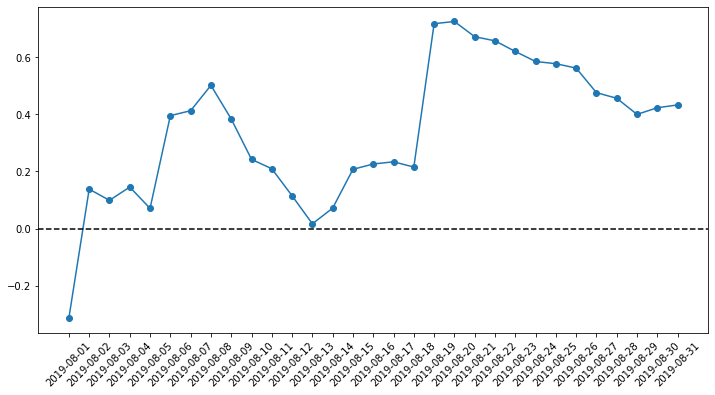

In [24]:
plt.figure(figsize = (12, 6))
plt.plot((ordersAggregated.loc[ordersAggregated['group'] == 'B', 'date']), 
         (ordersAggregated.loc[ordersAggregated['group'] == 'B', 'avg_revenue'].values / 
         ordersAggregated.loc[ordersAggregated['group'] == 'A', 'avg_revenue'].values - 1), marker = 'o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

Резких скачков даже больше одного, отмеченного ранее, например, 6 числа. Скорее всего, влияние слишком крупных заказов.

### *Шаг 5. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.*

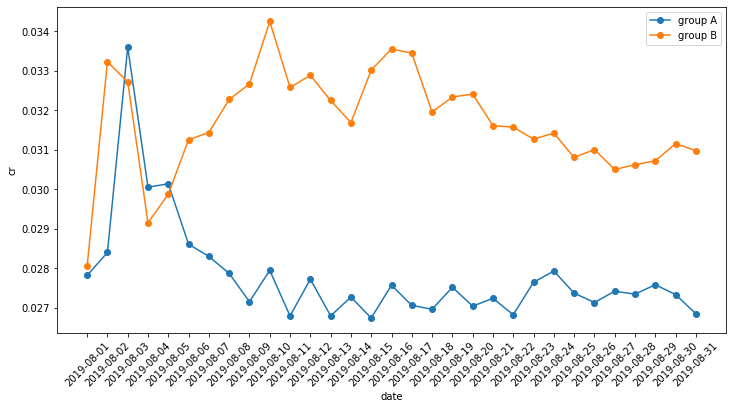

In [25]:
#Добавим столбец с конверсией
ordersAggregated['cr'] = ordersAggregated['buyers'] / ordersAggregated['visitors']

#Построим график
plot_grouped(ordersAggregated, 'cr')

Conversion Rate в группе А на 10% ниже, чем в группе В, и ко второй половине теста этот результат стабилизировался.

### *Шаг 6. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.*

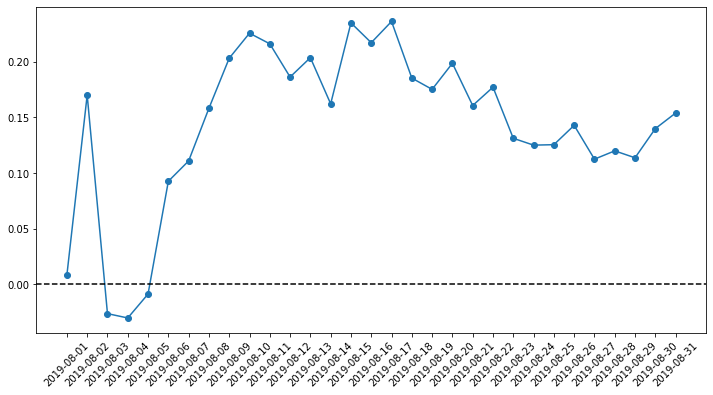

In [27]:
plt.figure(figsize = (12, 6))
plt.plot((ordersAggregated.loc[ordersAggregated['group'] == 'B', 'date']), 
         (ordersAggregated.loc[ordersAggregated['group'] == 'B', 'cr'].values / 
         ordersAggregated.loc[ordersAggregated['group'] == 'A', 'cr'].values - 1), marker = 'o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

Резкий скачок 6 числа.Но и в дальнейшем преимущество группы В росло, с 18 числа начало немного падать и с  23 числа стало стабильным в районе 10%.

### *Шаг 7. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.*

In [28]:
#Вспомним названия полей таблицы orders
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


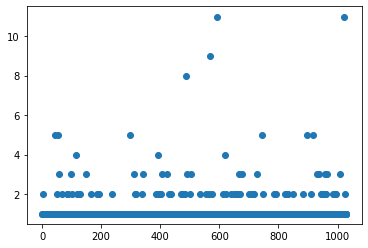

In [35]:
#Создадим датафрейм по заказам с группировкой по пользователям
orders_number = orders.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

#Построим график
x_values = pd.Series(range(0,len(orders_number)))
plt.scatter(x_values, orders_number['transactionId'])

Есть единичные пользователи, которые сделали 8 и более заказов. Основная масса пользователей делали 1-2 заказа.

### *Шаг 8. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.*

In [36]:
np.percentile(orders_number['transactionId'], [95, 99])

array([2., 4.])

Не более 5% пользователей сделали более 2 заказов, и не более 1% сделали более 4. По данным графика и перцентилей будем считать пользователей, которые совершили более 3 заказов - аномальными.

### *Шаг 9. Построить точечный график стоимостей заказов. Сделать выводы и предположения.*

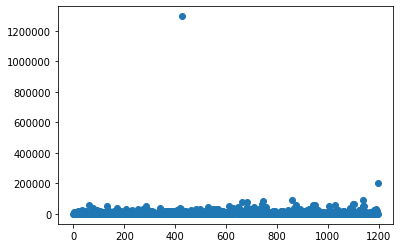

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Судя по графику, стоимость большинства заказов не превышает 100 тыс. Однако, есть заказы стоимостью 200 тыс, и даже более 1.2М.

### *Шаг 10. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.*

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Так как выбросы все-таки очень единичны, возьмем за границу 99-ый перцентиль, т.е. 60 тыс.

### *Шаг 11. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.*

In [51]:
#Создадим дф с количеством заказов по юзерам в группах А и В.
orders_number_A = orders[orders['group']=='A'].groupby('visitorId', 
                                                       as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_number_A.columns = ['visitorId', 'orders']


orders_number_B = orders[orders['group']=='B'].groupby('visitorId', 
                                                       as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_number_B.columns = ['visitorId', 'orders']

#Создадим дф с количеством визитов в день по группам
visitorsA = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsB = visitors[visitors['group']=='B'][['date', 'visitors']]

#Создадим дф для анализа, где проставим нули пользователям, которые ничего не заказали
cnv_A = pd.concat([orders_number_A['orders'], 
                   pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - 
                                                len(orders_number_A['orders'])), name='orders')],axis=0)
cnv_B = pd.concat([orders_number_B['orders'], 
                   pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - 
                                                len(orders_number_B['orders'])), name='orders')],axis=0)

#Посчитаем стат значимость различия между конверсиями
print("{0:.3f}".format(st.mannwhitneyu(cnv_A, cnv_B)[1]))
print("{0:.3f}".format(cnv_B.mean()/cnv_A.mean()-1))

0.008
0.138


По сырым данным различие между конверсиями составляет 14% в пользу группы B, и оно статистически значимо

### *Шаг 12. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.*

In [44]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.365


По сырым данным различие в среднем чеке не статистически значимо.

### *Шаг 13. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.*

In [50]:
#Создадим дф с юзерами, которые совершили более 3 заказов
many_orders = pd.concat([orders_number_A[orders_number_A['orders'] > 3]['visitorId'], 
                         orders_number_B[orders_number_B['orders'] > 3]['visitorId']], axis = 0)
#Создадим дф с юзерами, кто совершид заказы более, чем на 60 тыс.
expensive_orders = orders[orders['revenue'] > 60000]['visitorId']
#Объединим
abnormal = pd.concat([many_orders, expensive_orders], axis = 0).drop_duplicates()

#Создадим дф с очищенными данными
cnv_A_clean = pd.concat([orders_number_A[np.logical_not(orders_number_A['visitorId'].isin(abnormal))]['orders'],
                         pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - 
                                                      len(orders_number_A['orders'])),name='orders')],axis=0)
cnv_B_clean = pd.concat([orders_number_B[np.logical_not(orders_number_B['visitorId'].isin(abnormal))]['orders'],
                         pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - 
                                                      len(orders_number_B['orders'])),name='orders')],axis=0)

#Посчитаем стат значимость различия между конверсиями
print("{0:.3f}".format(st.mannwhitneyu(cnv_A_clean, cnv_B_clean)[1]))
print("{0:.3f}".format(cnv_B_clean.mean()/cnv_A_clean.mean()-1))

0.006
0.153


По очищенным данным различие между конверсияи так же статистически значимо и даже увеличилось до 14%.

### *Шаг 14. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.*

In [48]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormal)))]['revenue'])[1]))

0.460


По очищенным данным различие в среднем чеке так же статистически не значимо

### *Шаг 15. Принять решение по результатам теста и объяснить его.*

Нет статистически значимой разницы в средних чеках между группами A и B. Однако, в группе B на 15% больше конверсий, чем в группе A, и эта разница статистически значима.
То есть, мы имеем большее количество заказов при том же среднем чеке, а значит, большую выручку на то же самое количество юзеров.  
Признаем победу группы B и останавливаем тест.